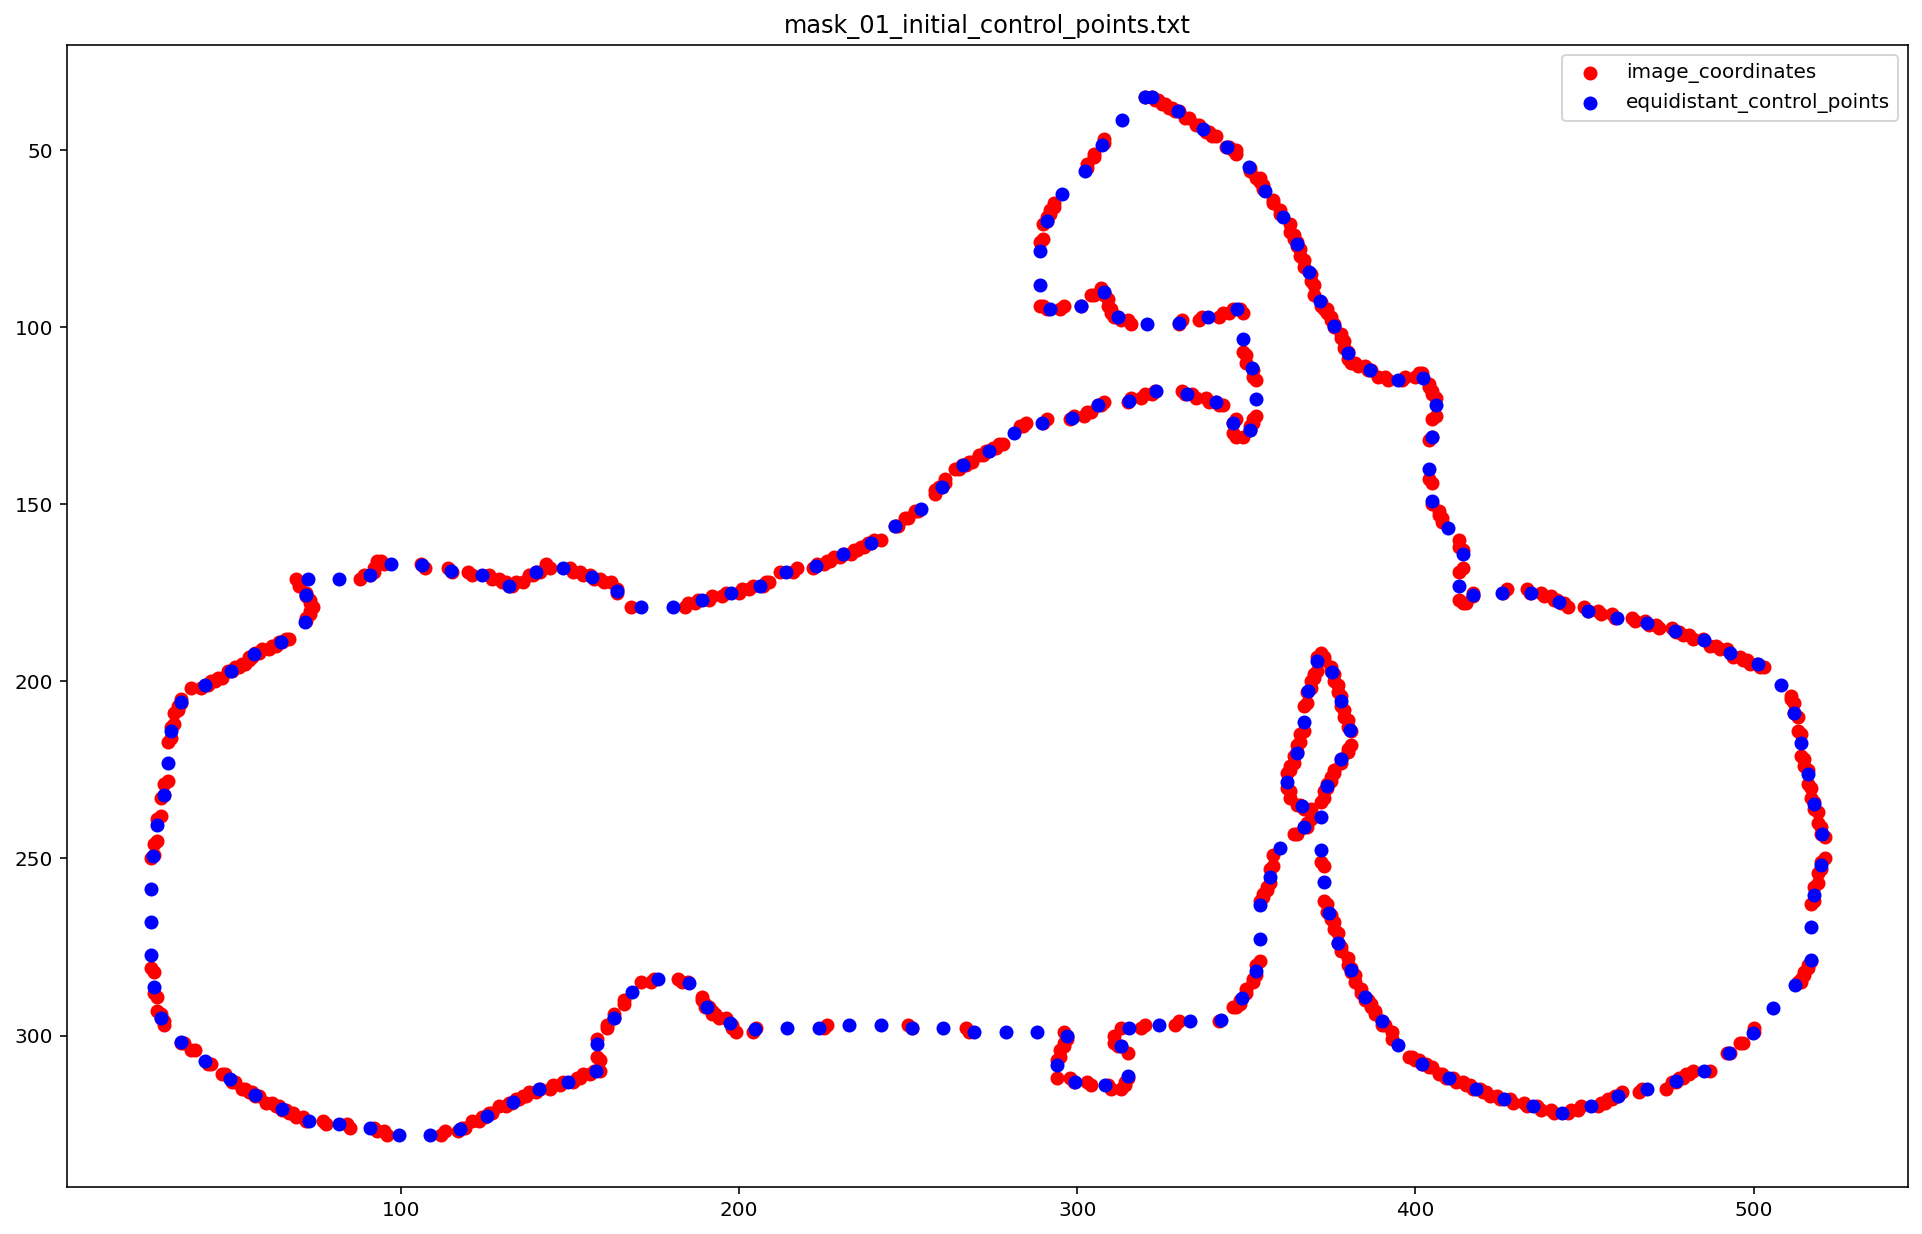

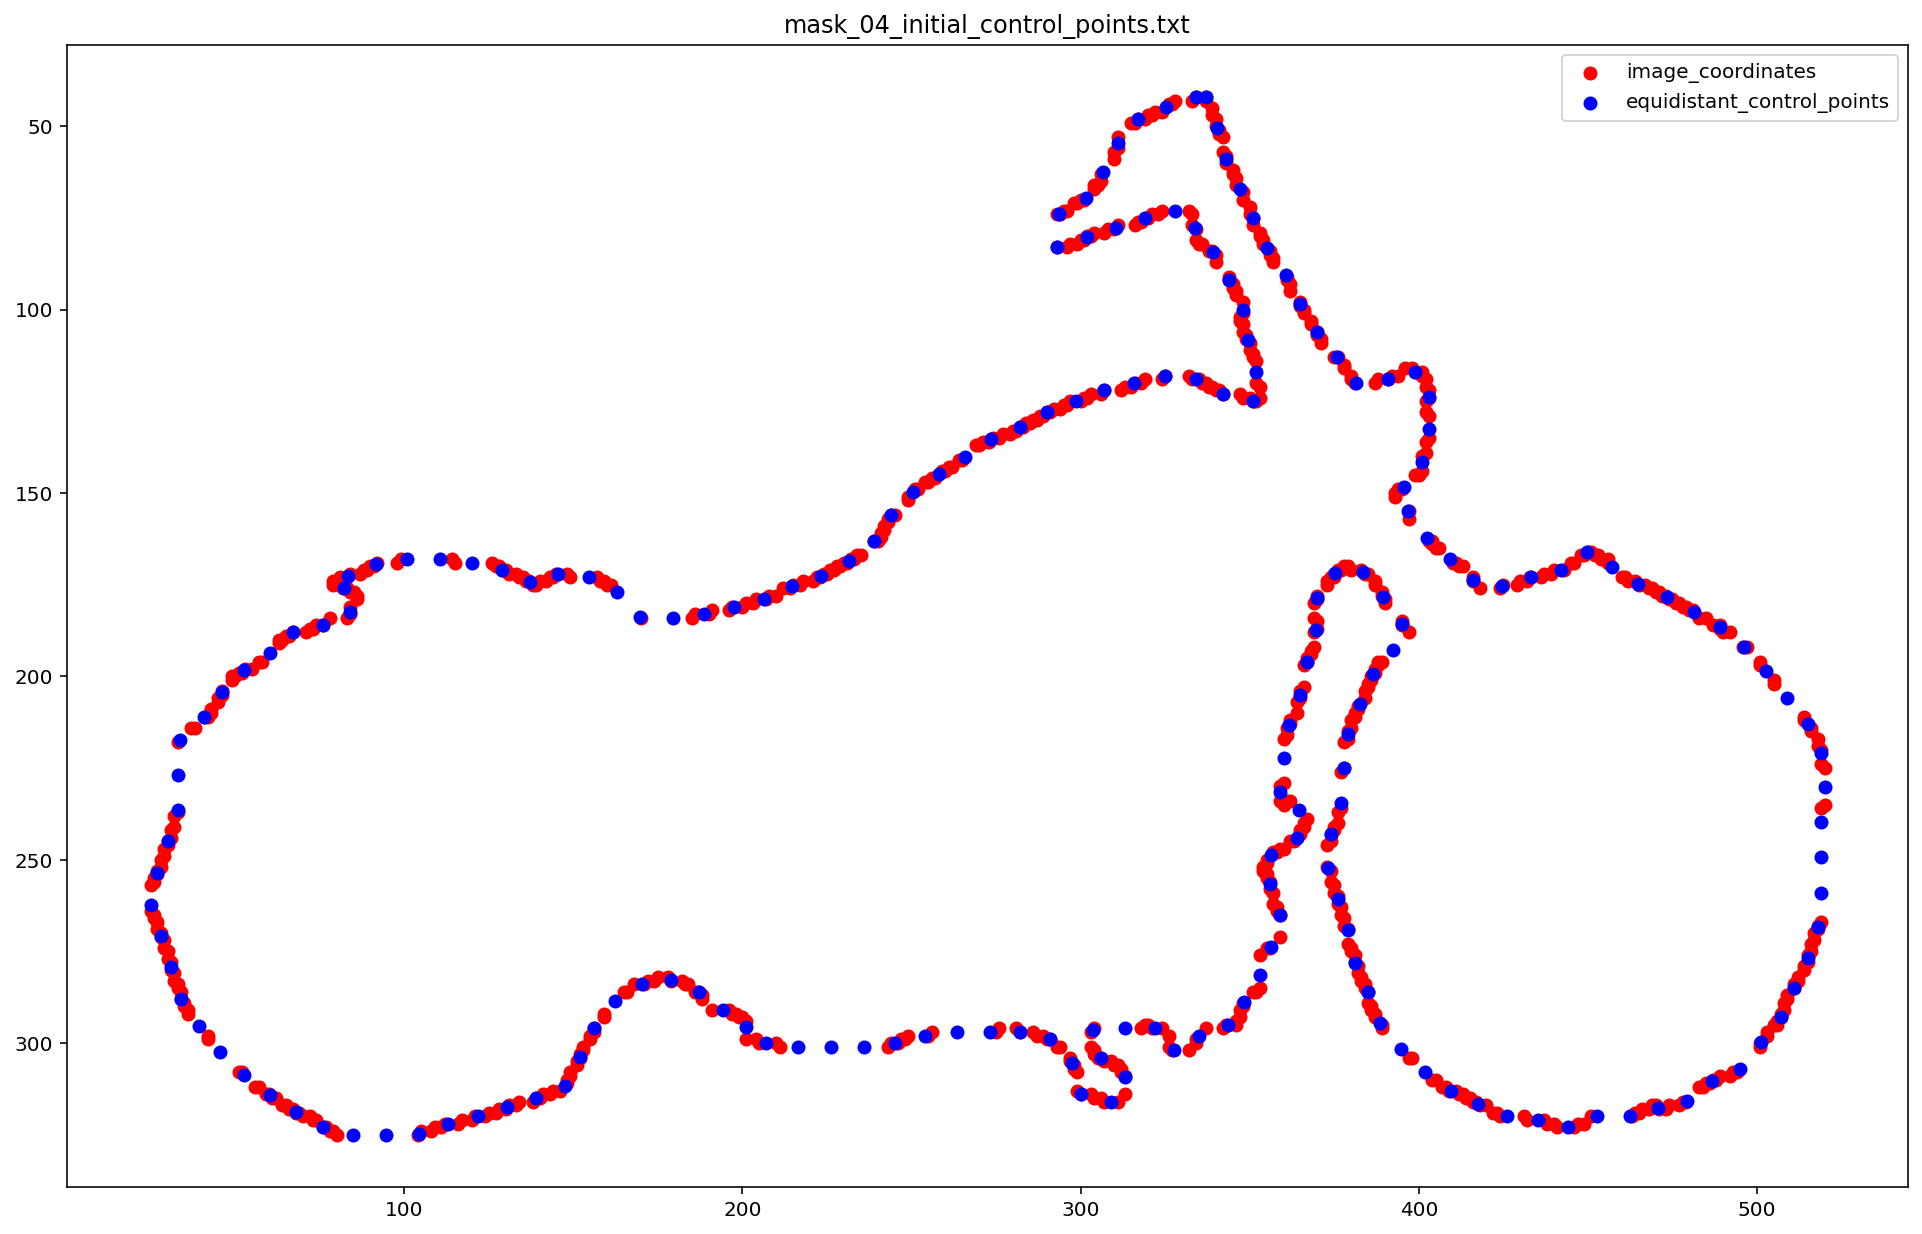

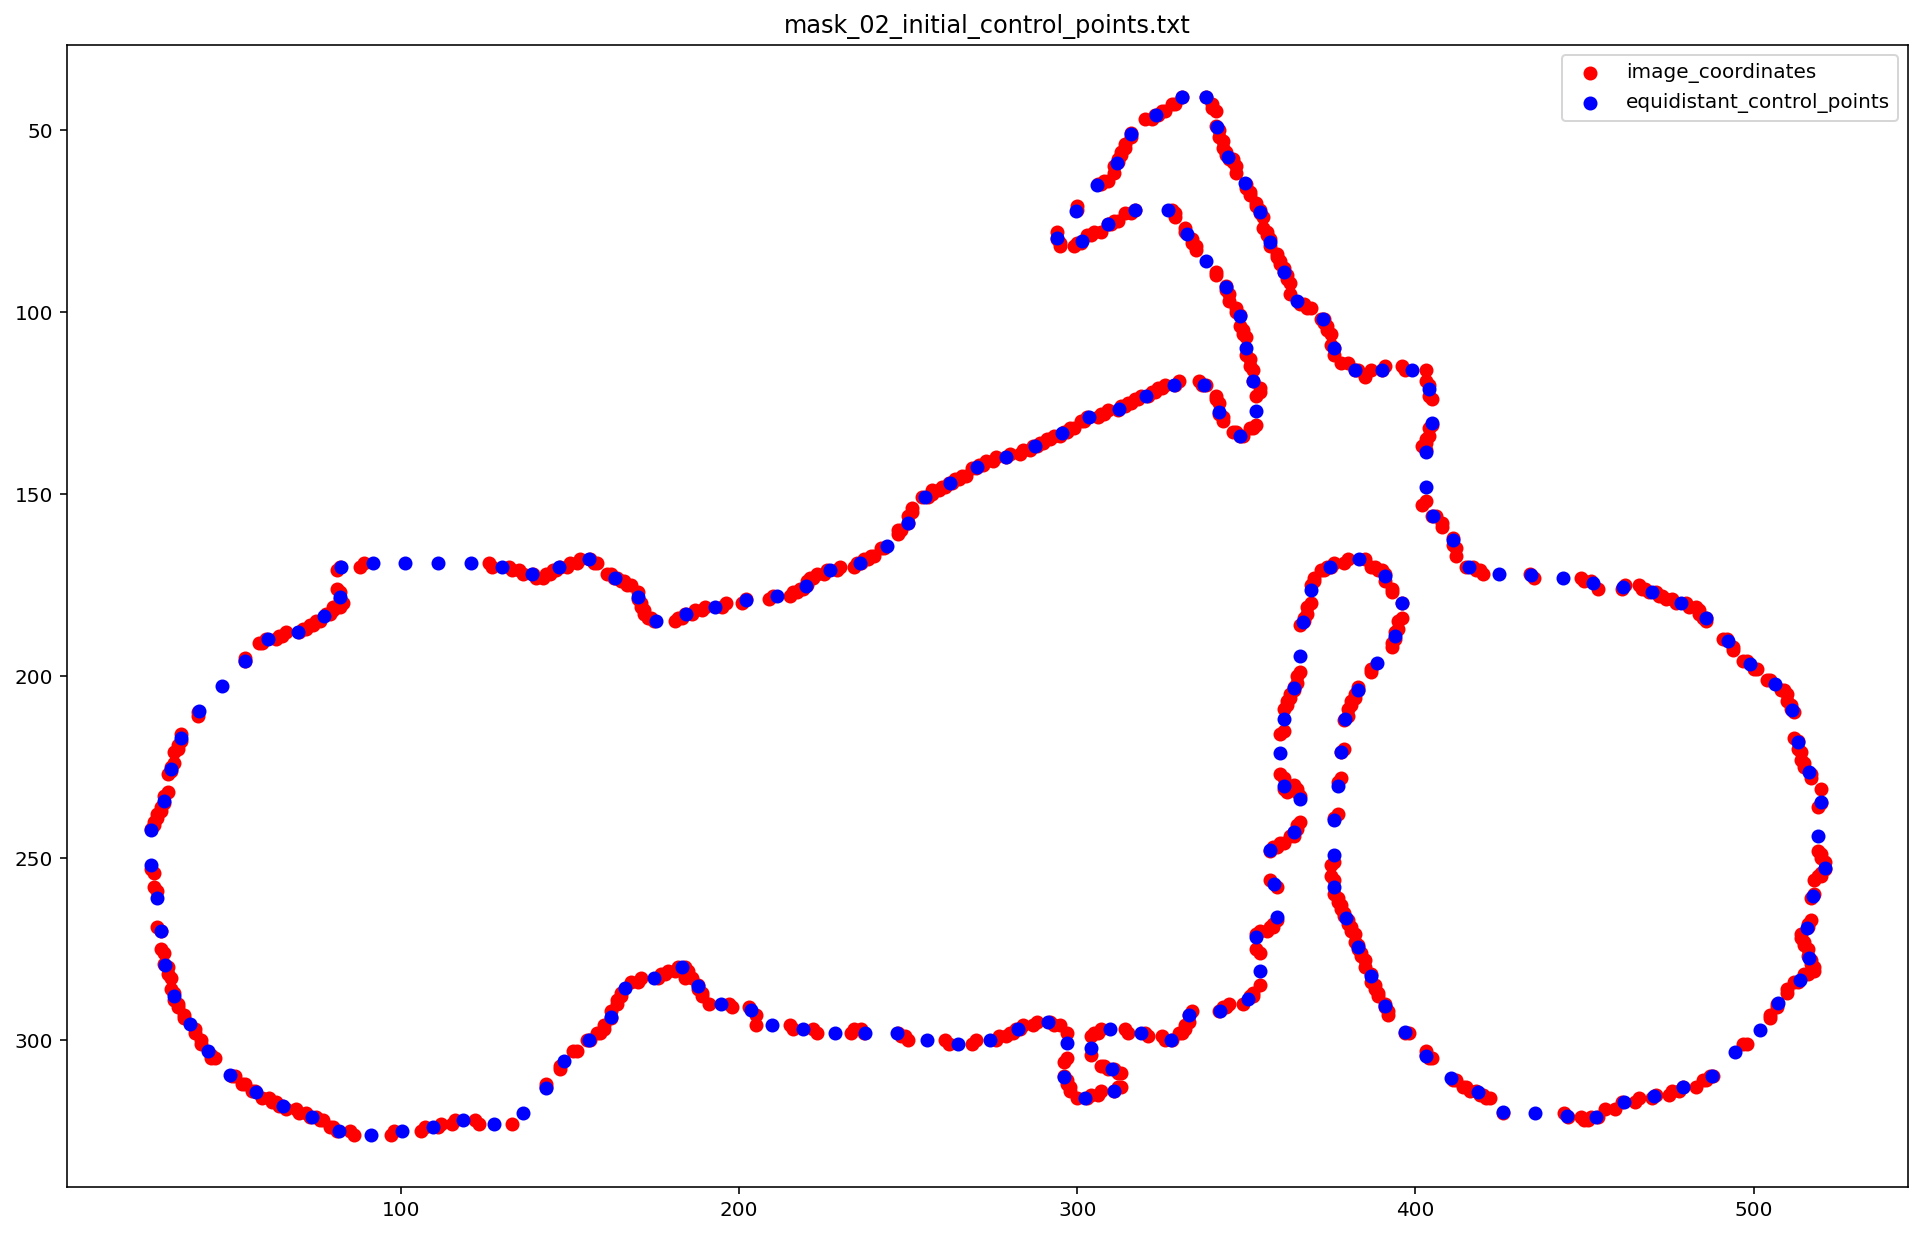

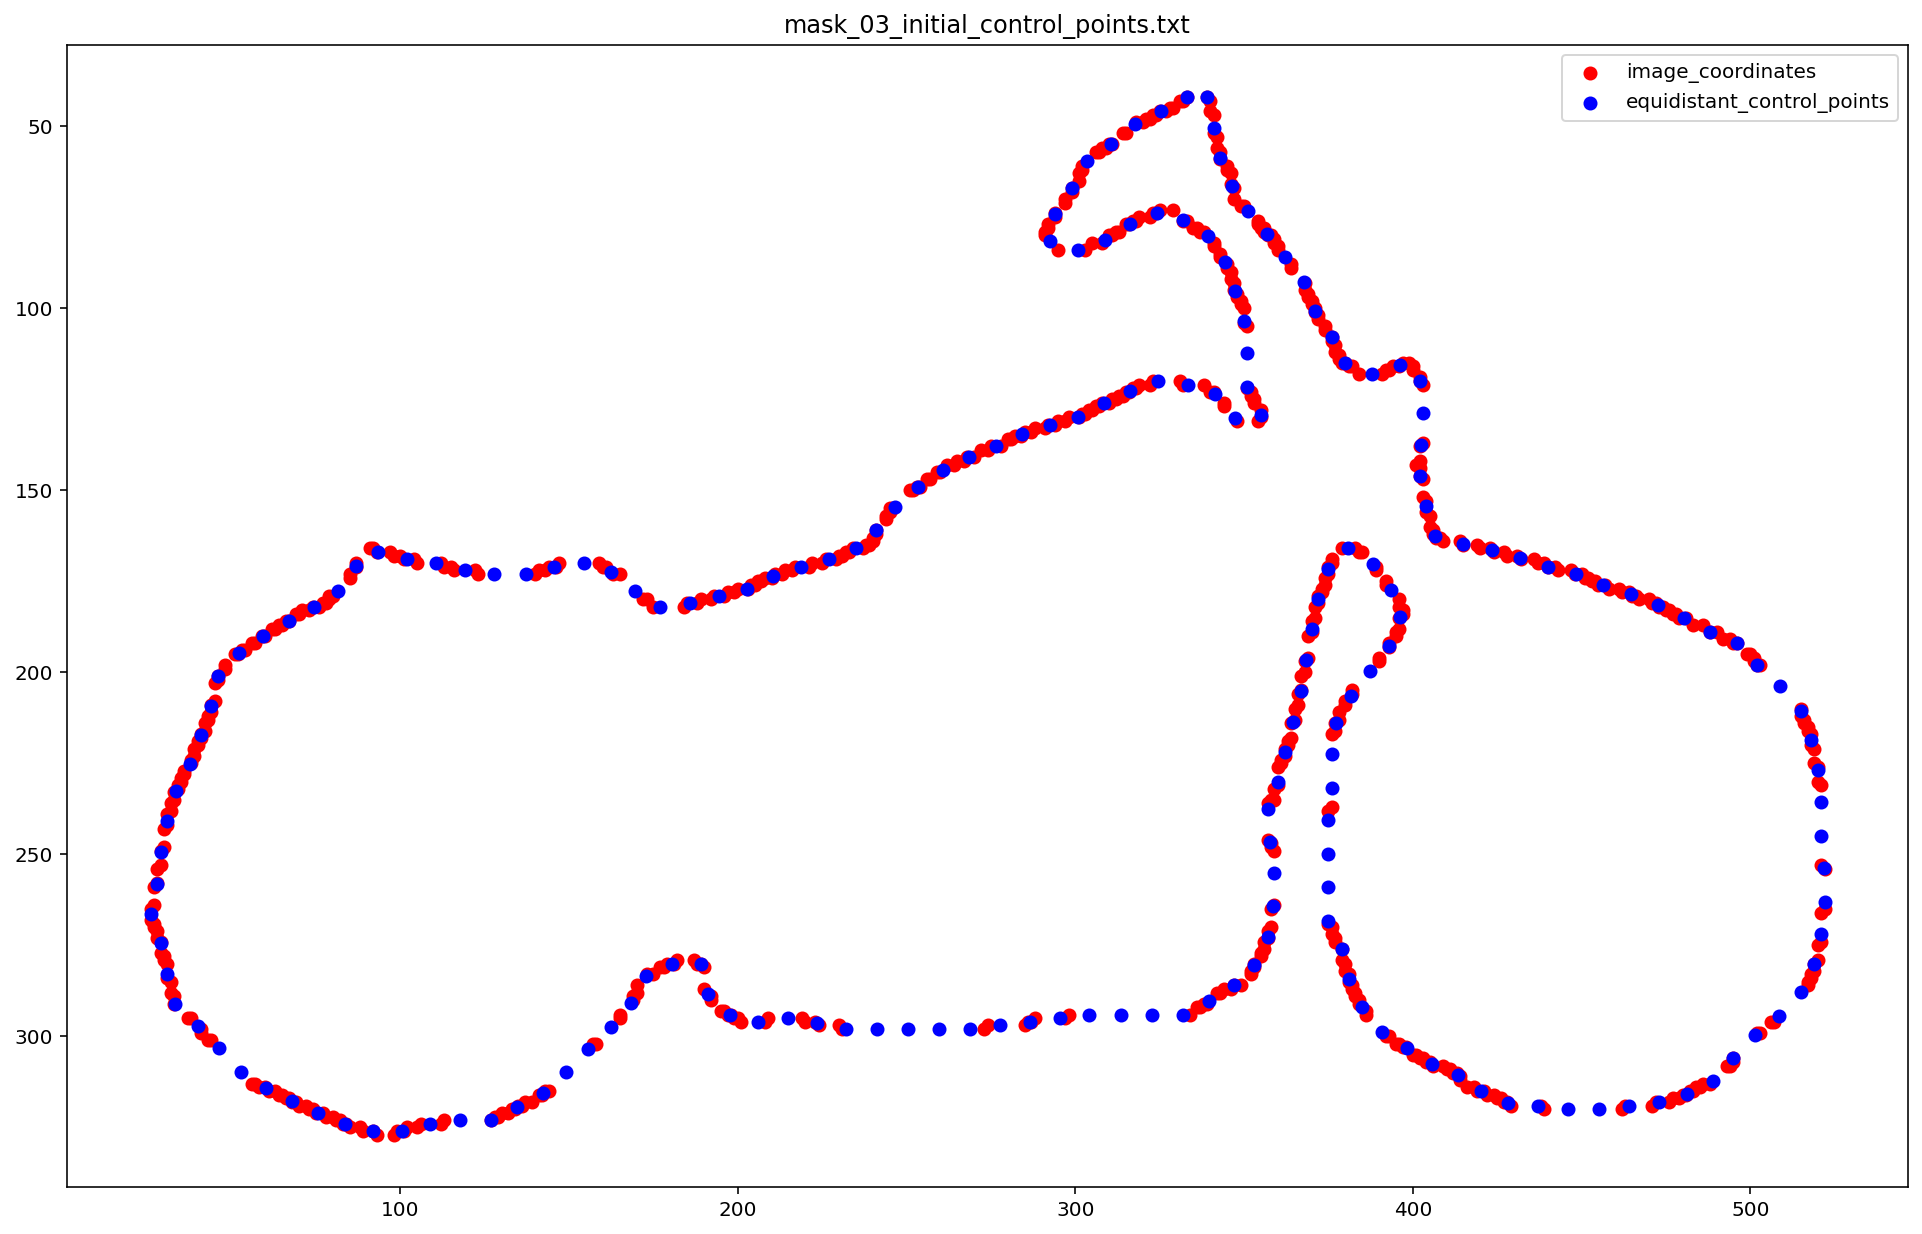

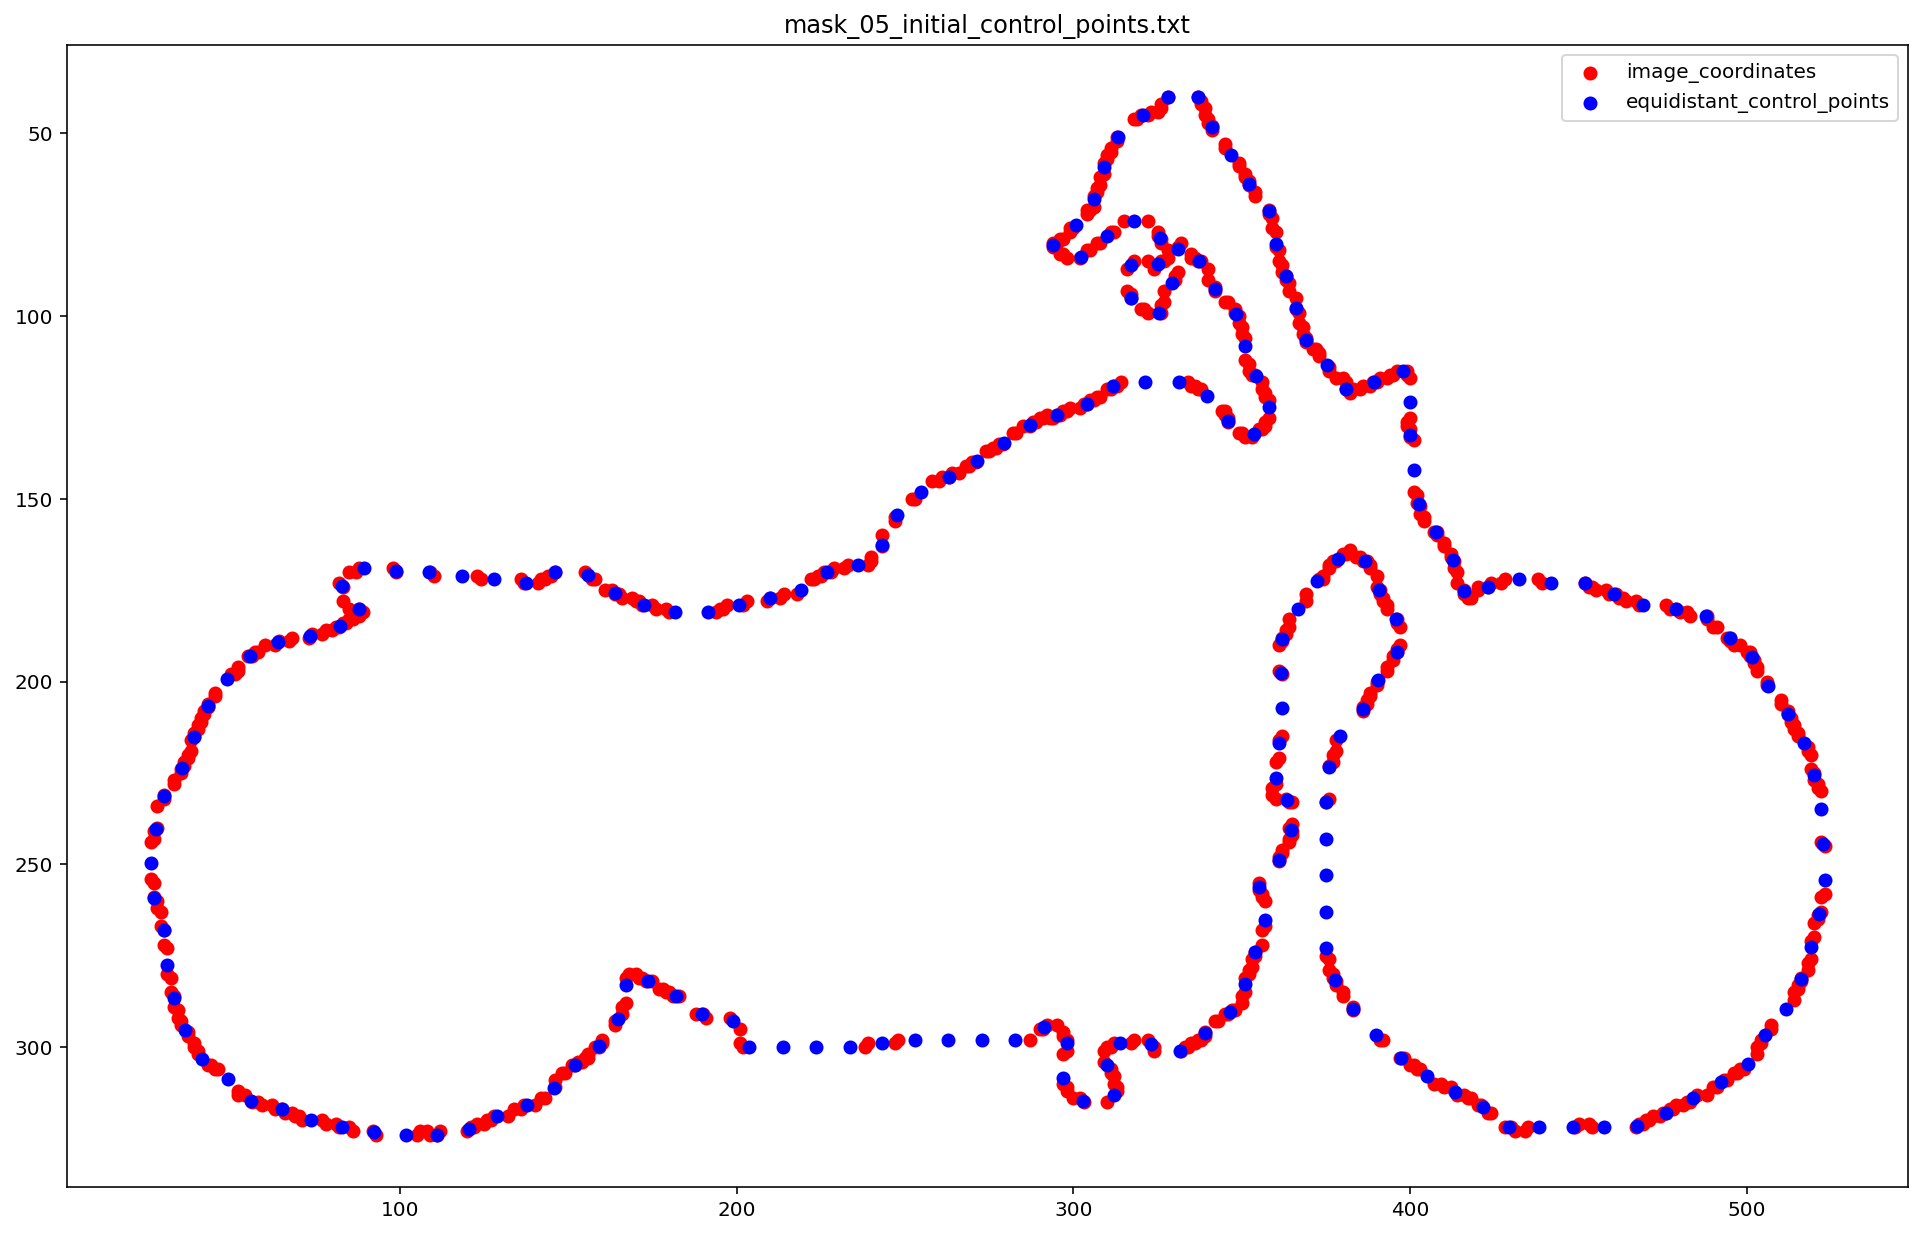

control points created succesfully


In [1]:
from shapely.geometry import LineString
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

data_path = "images"
data_base_input = os.path.join(data_path, 'mask_vtk/')
data_base_output = os.path.join(data_path, 'mask_initial_control_points/')
os.makedirs(data_base_output, exist_ok=True)

filenames = [file for file in os.listdir(data_base_input)]

for filename in filenames:
    file = open(os.path.join(data_base_input, filename), 'r')
    lines_of_file = file.readlines()

    startLine = [i for i,line in enumerate(lines_of_file) if line[:6] == "POINTS"][0] + 1
    endLine = [i for i,line in enumerate(lines_of_file) if line[:5] == "LINES"][0]

    list_of_all_points = []
    for i in range(startLine,endLine):
        list_of_all_points.extend(list(map(float, lines_of_file[i].split())))

    x_coordinates = list_of_all_points[0::3]
    y_coordinates = list_of_all_points[1::3]

    xy_coordinates = []
    for i in range(len(x_coordinates)):
        xy_coordinates.append([x_coordinates[i], y_coordinates[i]])

    line_string = LineString(xy_coordinates)
    number_of_points = 200
    new_points = [line_string.interpolate(i/float(number_of_points - 1), normalized=True) for i in range(number_of_points)]
    equidistant_control_points = [[point.x, point.y] for point in new_points]
    np.savetxt(os.path.join(data_base_output, filename[:-4] + '_initial_control_points.txt'), equidistant_control_points, fmt="%s")
    
    #plot image coordinates and equidistant control points
    """
    x = x_coordinates
    y = y_coordinates
    x1 = [i[0] for i in equidistant_control_points]
    y1 = [i[1] for i in equidistant_control_points]

    plt.rcParams['figure.figsize'] = [16.5,10.5 ]
    plt.scatter(x,y, c='r', label='image_coordinates')
    plt.scatter(x1,y1, c='b', label='equidistant_control_points')
    plt.legend(loc='upper right')
    plt.gca().invert_yaxis();
    plt.title(filename[:-4] + '_initial_control_points.txt')
    plt.show()"""
    
print("control points created succesfully")